In [1]:
from PIL import Image
import numpy as np
import pandas as pd

# Load the image
image_path ="E:\OHRC\chandrayan-2.png"
image = Image.open(image_path)
width, height = image.size

# Define how many parts to split the image into (e.g., 4x4 grid)
rows = 4
cols = 4

# Calculate the size of each small part
part_width = width // cols
part_height = height // rows

# Initialize a list to hold the data for the dataset
data = []

# Example metadata (Replace with actual metadata)
CRVAL1 = 80.0  # Central Longitude (replace with actual)
CRVAL2 = 20.0  # Central Latitude (replace with actual)
CDELT1 = 0.1   # Longitude increment per pixel (replace with actual)
CDELT2 = 0.1   # Latitude increment per pixel (replace with actual)

# Loop through the image and create smaller parts
for i in range(rows):
    for j in range(cols):
        # Define the box to crop
        left = j * part_width
        upper = i * part_height
        right = left + part_width
        lower = upper + part_height

        # Crop the image to get the small part
        small_part = image.crop((left, upper, right, lower))

        # Calculate the geographic coordinates for the center of the small part
        center_x = left + part_width // 2
        center_y = upper + part_height // 2
        longitude = CRVAL1 + (center_x * CDELT1)
        latitude = CRVAL2 + (center_y * CDELT2)

        # Save the small image and the corresponding coordinates
        small_part_name = f'small_part_{i}_{j}.png'
        small_part.save(small_part_name)

        # Append data to the dataset
        data.append({
            'image': small_part_name,
            'longitude': longitude,
            'latitude': latitude
        })

# Create a DataFrame to hold the dataset
dataset = pd.DataFrame(data)

# Save the dataset to a CSV file
dataset.to_csv('dataset_coordinates.csv', index=False)

print("Dataset created with small images and coordinates.")


Dataset created with small images and coordinates.


In [5]:
pip install astropy


   ---------------------------------------- 0.0/6.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.4 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.4 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.4 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.4 MB ? eta -:--:--
   --- ------------------------------------ 0.5/6.4 MB 453.5 kB/s eta 0:00:13
   --- ------------------------------------ 0.5/6.4 MB 453.5 kB/s eta 0:00:13
   ---- ----------------------------------- 0.8/6.4 MB 466.0 kB/s eta 0:00:13
   ---- ----------------------------------- 0.8/6.4 MB 466.0 kB/s eta 0:00:13
   ------ --------------------------------- 1.0/6.4 MB 535.4 kB/s eta 0:00:10
   ------ --------------------------------- 1.0/6.4 MB 535.4 kB/s eta 0:00:10
   ------ --------------------------------- 1.0/

In [6]:
import os
from PIL import Image, ImageFilter, ImageEnhance

# Directories
input_dir = "E:\OHRC\original images"  # Directory containing small images
output_dir = "E:\OHRC\Enhanced"  # Directory to save enhanced images

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Process each image in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        image_path = os.path.join(input_dir, filename)
        print(f'Processing {image_path}')
        
        # Load image
        image = Image.open(image_path)

        # Apply Unsharp Mask for sharpening
        sharpened_image = image.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))

        # Enhance contrast
        enhancer = ImageEnhance.Contrast(sharpened_image)
        contrasted_image = enhancer.enhance(1.5)  # Increase contrast

        # Enhance brightness
        enhancer = ImageEnhance.Brightness(contrasted_image)
        brightened_image = enhancer.enhance(1.2)  # Increase brightness

        # Resize the image (if needed)
        upscaled_image = brightened_image.resize((brightened_image.width * 2, brightened_image.height * 2), Image.LANCZOS)

        # Save the enhanced image
        enhanced_image_path = os.path.join(output_dir, f'enhanced_{filename}')
        upscaled_image.save(enhanced_image_path)

        print(f'Saved enhanced image to {enhanced_image_path}')


Processing E:\OHRC\original images\small_part_0_0.png
Saved enhanced image to E:\OHRC\Enhanced\enhanced_small_part_0_0.png
Processing E:\OHRC\original images\small_part_0_1.png
Saved enhanced image to E:\OHRC\Enhanced\enhanced_small_part_0_1.png
Processing E:\OHRC\original images\small_part_0_2.png
Saved enhanced image to E:\OHRC\Enhanced\enhanced_small_part_0_2.png
Processing E:\OHRC\original images\small_part_0_3.png
Saved enhanced image to E:\OHRC\Enhanced\enhanced_small_part_0_3.png
Processing E:\OHRC\original images\small_part_1_0.png
Saved enhanced image to E:\OHRC\Enhanced\enhanced_small_part_1_0.png
Processing E:\OHRC\original images\small_part_1_1.png
Saved enhanced image to E:\OHRC\Enhanced\enhanced_small_part_1_1.png
Processing E:\OHRC\original images\small_part_1_2.png
Saved enhanced image to E:\OHRC\Enhanced\enhanced_small_part_1_2.png
Processing E:\OHRC\original images\small_part_1_3.png
Saved enhanced image to E:\OHRC\Enhanced\enhanced_small_part_1_3.png
Processing E:\OH

In [10]:
import os
import numpy as np
from PIL import Image

# Directories
input_dir = "E:\OHRC\Enhanced" # Directory containing enhanced images
output_dir ="E:\OHRC\Preprocessed"  # Directory to save preprocessed images

# Parameters
image_size = (224, 224)  # Resize to this size (adjust based on model requirements)
normalize = True  # Whether to normalize pixel values

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Process each enhanced image
for filename in os.listdir(input_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        image_path = os.path.join(input_dir, filename)
        print(f'Preprocessing {image_path}')
        
        # Load image
        image = Image.open(image_path)
        
        # Resize the image
        resized_image = image.resize(image_size)

        # Convert to numpy array
        image_array = np.array(resized_image)

        # Normalize pixel values if needed
        if normalize:
            image_array = image_array / 255.0  # Scale to [0, 1]

        # Save the preprocessed image
        # Make sure to create the file path correctly
        preprocessed_image_path = os.path.join(output_dir, f'preprocessed_{filename.replace(".png", "").replace(".jpg", "").replace(".jpeg", "")}.npy')
        
        # Save as a numpy array
        np.save(preprocessed_image_path, image_array)
        
        print(f'Saved preprocessed image to {preprocessed_image_path}')


Preprocessing E:\OHRC\Enhanced\enhanced_small_part_0_0.png
Saved preprocessed image to E:\OHRC\Preprocessed\preprocessed_enhanced_small_part_0_0.npy
Preprocessing E:\OHRC\Enhanced\enhanced_small_part_0_1.png
Saved preprocessed image to E:\OHRC\Preprocessed\preprocessed_enhanced_small_part_0_1.npy
Preprocessing E:\OHRC\Enhanced\enhanced_small_part_0_2.png
Saved preprocessed image to E:\OHRC\Preprocessed\preprocessed_enhanced_small_part_0_2.npy
Preprocessing E:\OHRC\Enhanced\enhanced_small_part_0_3.png
Saved preprocessed image to E:\OHRC\Preprocessed\preprocessed_enhanced_small_part_0_3.npy
Preprocessing E:\OHRC\Enhanced\enhanced_small_part_1_0.png
Saved preprocessed image to E:\OHRC\Preprocessed\preprocessed_enhanced_small_part_1_0.npy
Preprocessing E:\OHRC\Enhanced\enhanced_small_part_1_1.png
Saved preprocessed image to E:\OHRC\Preprocessed\preprocessed_enhanced_small_part_1_1.npy
Preprocessing E:\OHRC\Enhanced\enhanced_small_part_1_2.png
Saved preprocessed image to E:\OHRC\Preprocesse

Found .npy image files: ['preprocessed_enhanced_small_part_0_0.npy', 'preprocessed_enhanced_small_part_0_1.npy', 'preprocessed_enhanced_small_part_0_2.npy', 'preprocessed_enhanced_small_part_0_3.npy', 'preprocessed_enhanced_small_part_1_0.npy', 'preprocessed_enhanced_small_part_1_1.npy', 'preprocessed_enhanced_small_part_1_2.npy', 'preprocessed_enhanced_small_part_1_3.npy', 'preprocessed_enhanced_small_part_2_0.npy', 'preprocessed_enhanced_small_part_2_1.npy', 'preprocessed_enhanced_small_part_2_2.npy', 'preprocessed_enhanced_small_part_2_3.npy', 'preprocessed_enhanced_small_part_3_0.npy', 'preprocessed_enhanced_small_part_3_1.npy', 'preprocessed_enhanced_small_part_3_2.npy', 'preprocessed_enhanced_small_part_3_3.npy']


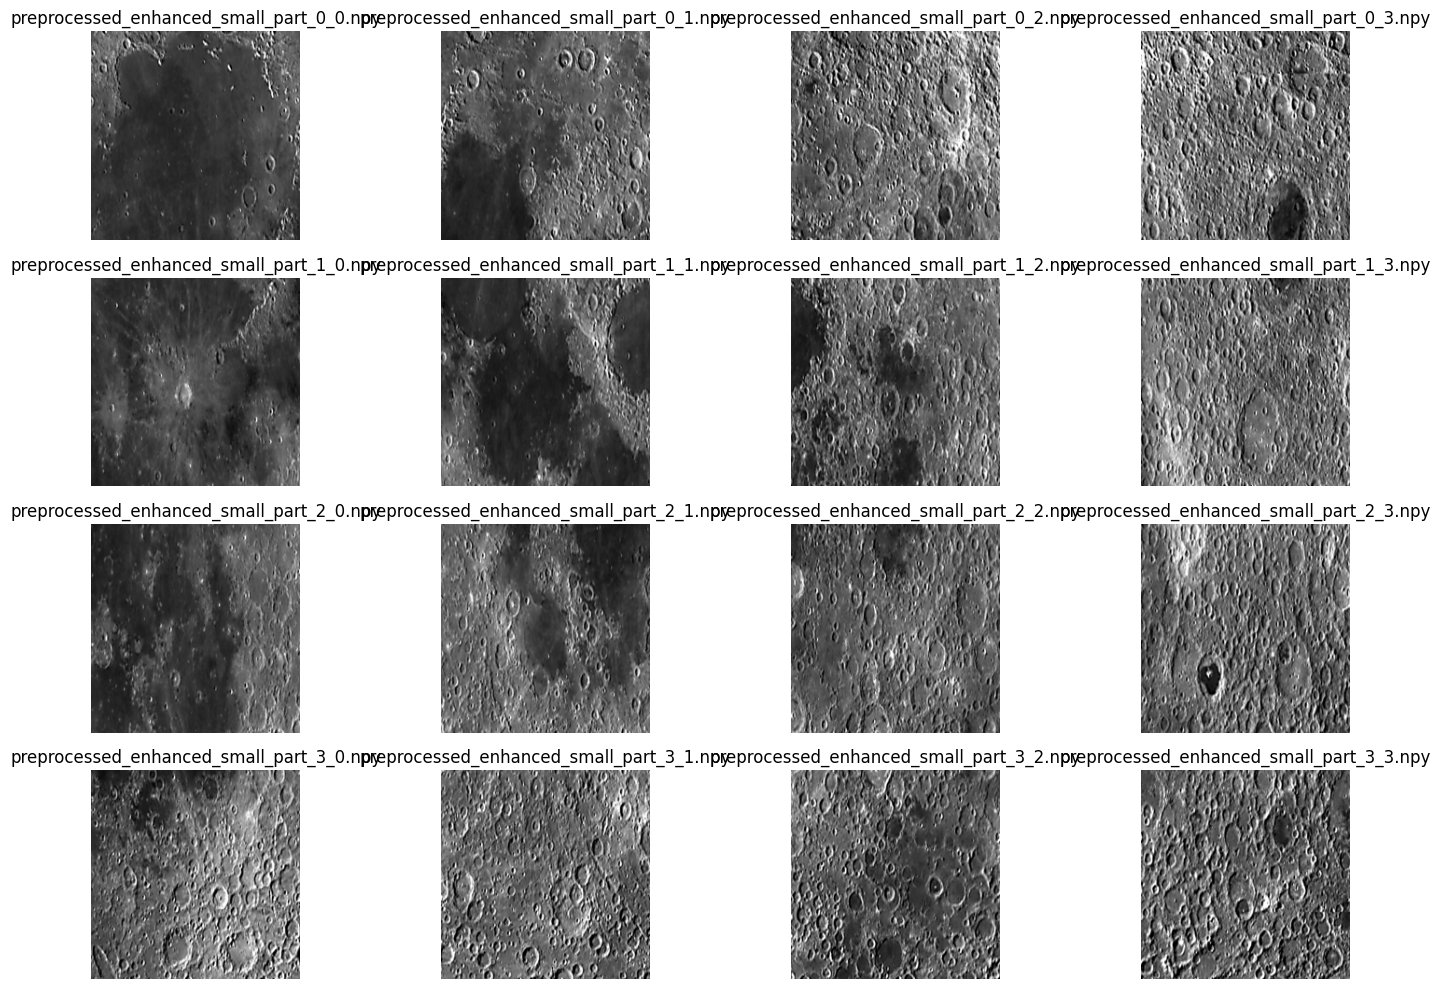

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Directory containing preprocessed .npy images
output_dir ="E:\OHRC\Preprocessed"  # Adjust this path if necessary

# List of preprocessed .npy images
image_files = [f for f in os.listdir(output_dir) if f.endswith('.npy')]

# Debug: Print the found .npy image files
print("Found .npy image files:", image_files)

# Check if there are any .npy images to display
if len(image_files) == 0:
    print("No .npy images found in the specified directory.")
else:
    # Set up the matplotlib figure
    plt.figure(figsize=(15, 10))

    # Loop through the .npy images and display them
    for i, filename in enumerate(image_files):
        # Load the .npy file
        image_array = np.load(os.path.join(output_dir, filename))
        
        # Display the image
        plt.subplot(4, 4, i + 1)  # Adjust the number of rows and columns as needed
        plt.imshow(image_array)  # Display the image
        plt.title(filename)  # Title with filename
        plt.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()


In [17]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.
